### Problem statement and business case

- Hiring processes are difficult
- Hire new people could be really expensive. It requires capital, time and skills

The company requires a model that could predict which employees are more likely to quit

Prediction value (attrition):
1: Quit
0: Stay


Available variables:
- 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
'DistanceFromHome', 'Education', 'EducationField',
'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
'YearsSinceLastPromotion', 'YearsWithCurrManager'

### 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from imblearn.over_sampling import SMOTE


In [2]:
employee_df = pd.read_csv('./Data/Human_Resources.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 2. Data visualization

#### Replace string values for int values

In [6]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x== 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x== 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x:1 if x== 'Y' else 0)

In [7]:
employee_df['OverTime'].value_counts()

OverTime
0    1054
1     416
Name: count, dtype: int64

#### Check if there are missing data

In [8]:
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

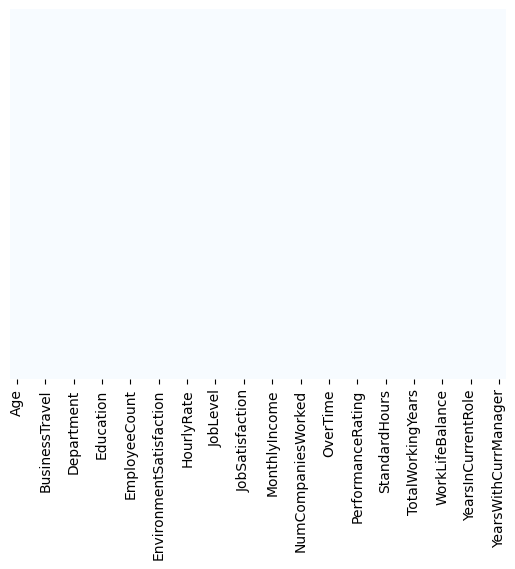

In [9]:
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar = False, cmap='Blues')

#### Data histogram

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

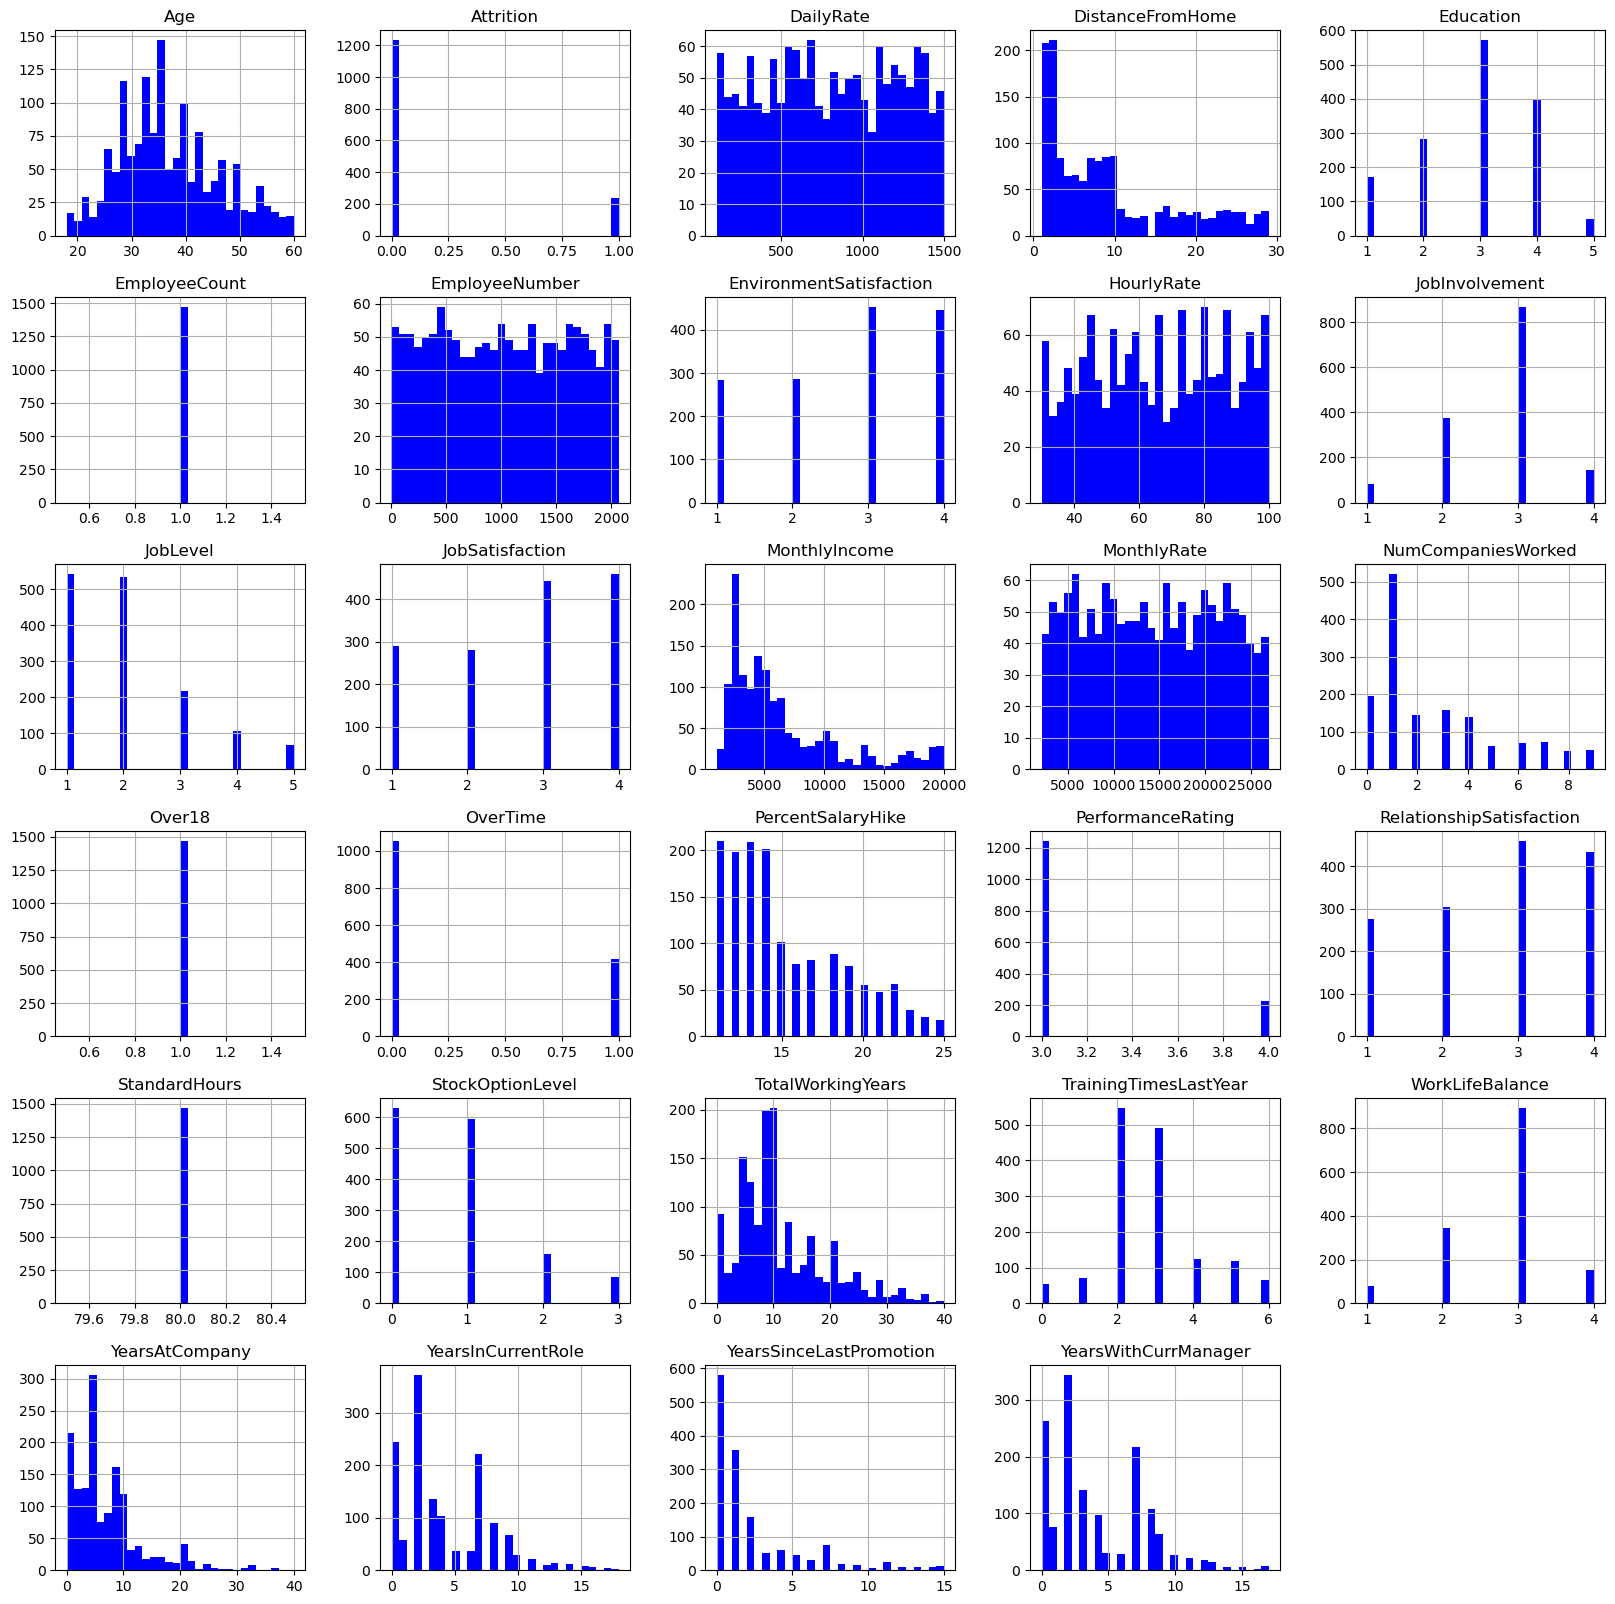

In [10]:
employee_df.hist(bins=30, figsize=(20,20), color='b')

In [11]:
employee_df['Over18'].value_counts()

Over18
1    1470
Name: count, dtype: int64

EmployeeCount, EmployeeNumber, StandardHours, and Over18 don't change from one employee to another, so they are dropped

In [12]:
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], inplace=True, axis=1)
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### Employees that left the company

In [13]:
number_of_employees = len(employee_df)
print(number_of_employees)

1470


In [14]:
left_company_df = employee_df[employee_df['Attrition']==1]
stayed_company_df = employee_df[employee_df['Attrition']==0]

In [15]:
print("Employes who left:", len(left_company_df), "which represents the", len(left_company_df)/number_of_employees*100,"%")
print("Employes who stayed:", len(stayed_company_df), "which represents the", len(stayed_company_df)/number_of_employees*100,"%")

Employes who left: 237 which represents the 16.122448979591837 %
Employes who stayed: 1233 which represents the 83.87755102040816 %


In [16]:
left_company_df.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [17]:
stayed_company_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


- 'age': mean age of the employees who stayed is higher compared to who left
- 'DailyRate': Rate of employees who stayed is higher
- 'DistanceFromHome': Employees who stayed live closer to home
- 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
- 'StockOptionLevel': Employees who stayed tend to have higher stock option level

In [18]:
string_columns = employee_df.select_dtypes(include=['object']).columns

print("Categorical columns with string values:", string_columns)

Categorical columns with string values: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')


In [19]:
employee_df_corr = employee_df.drop(string_columns, axis=1)

<Axes: >

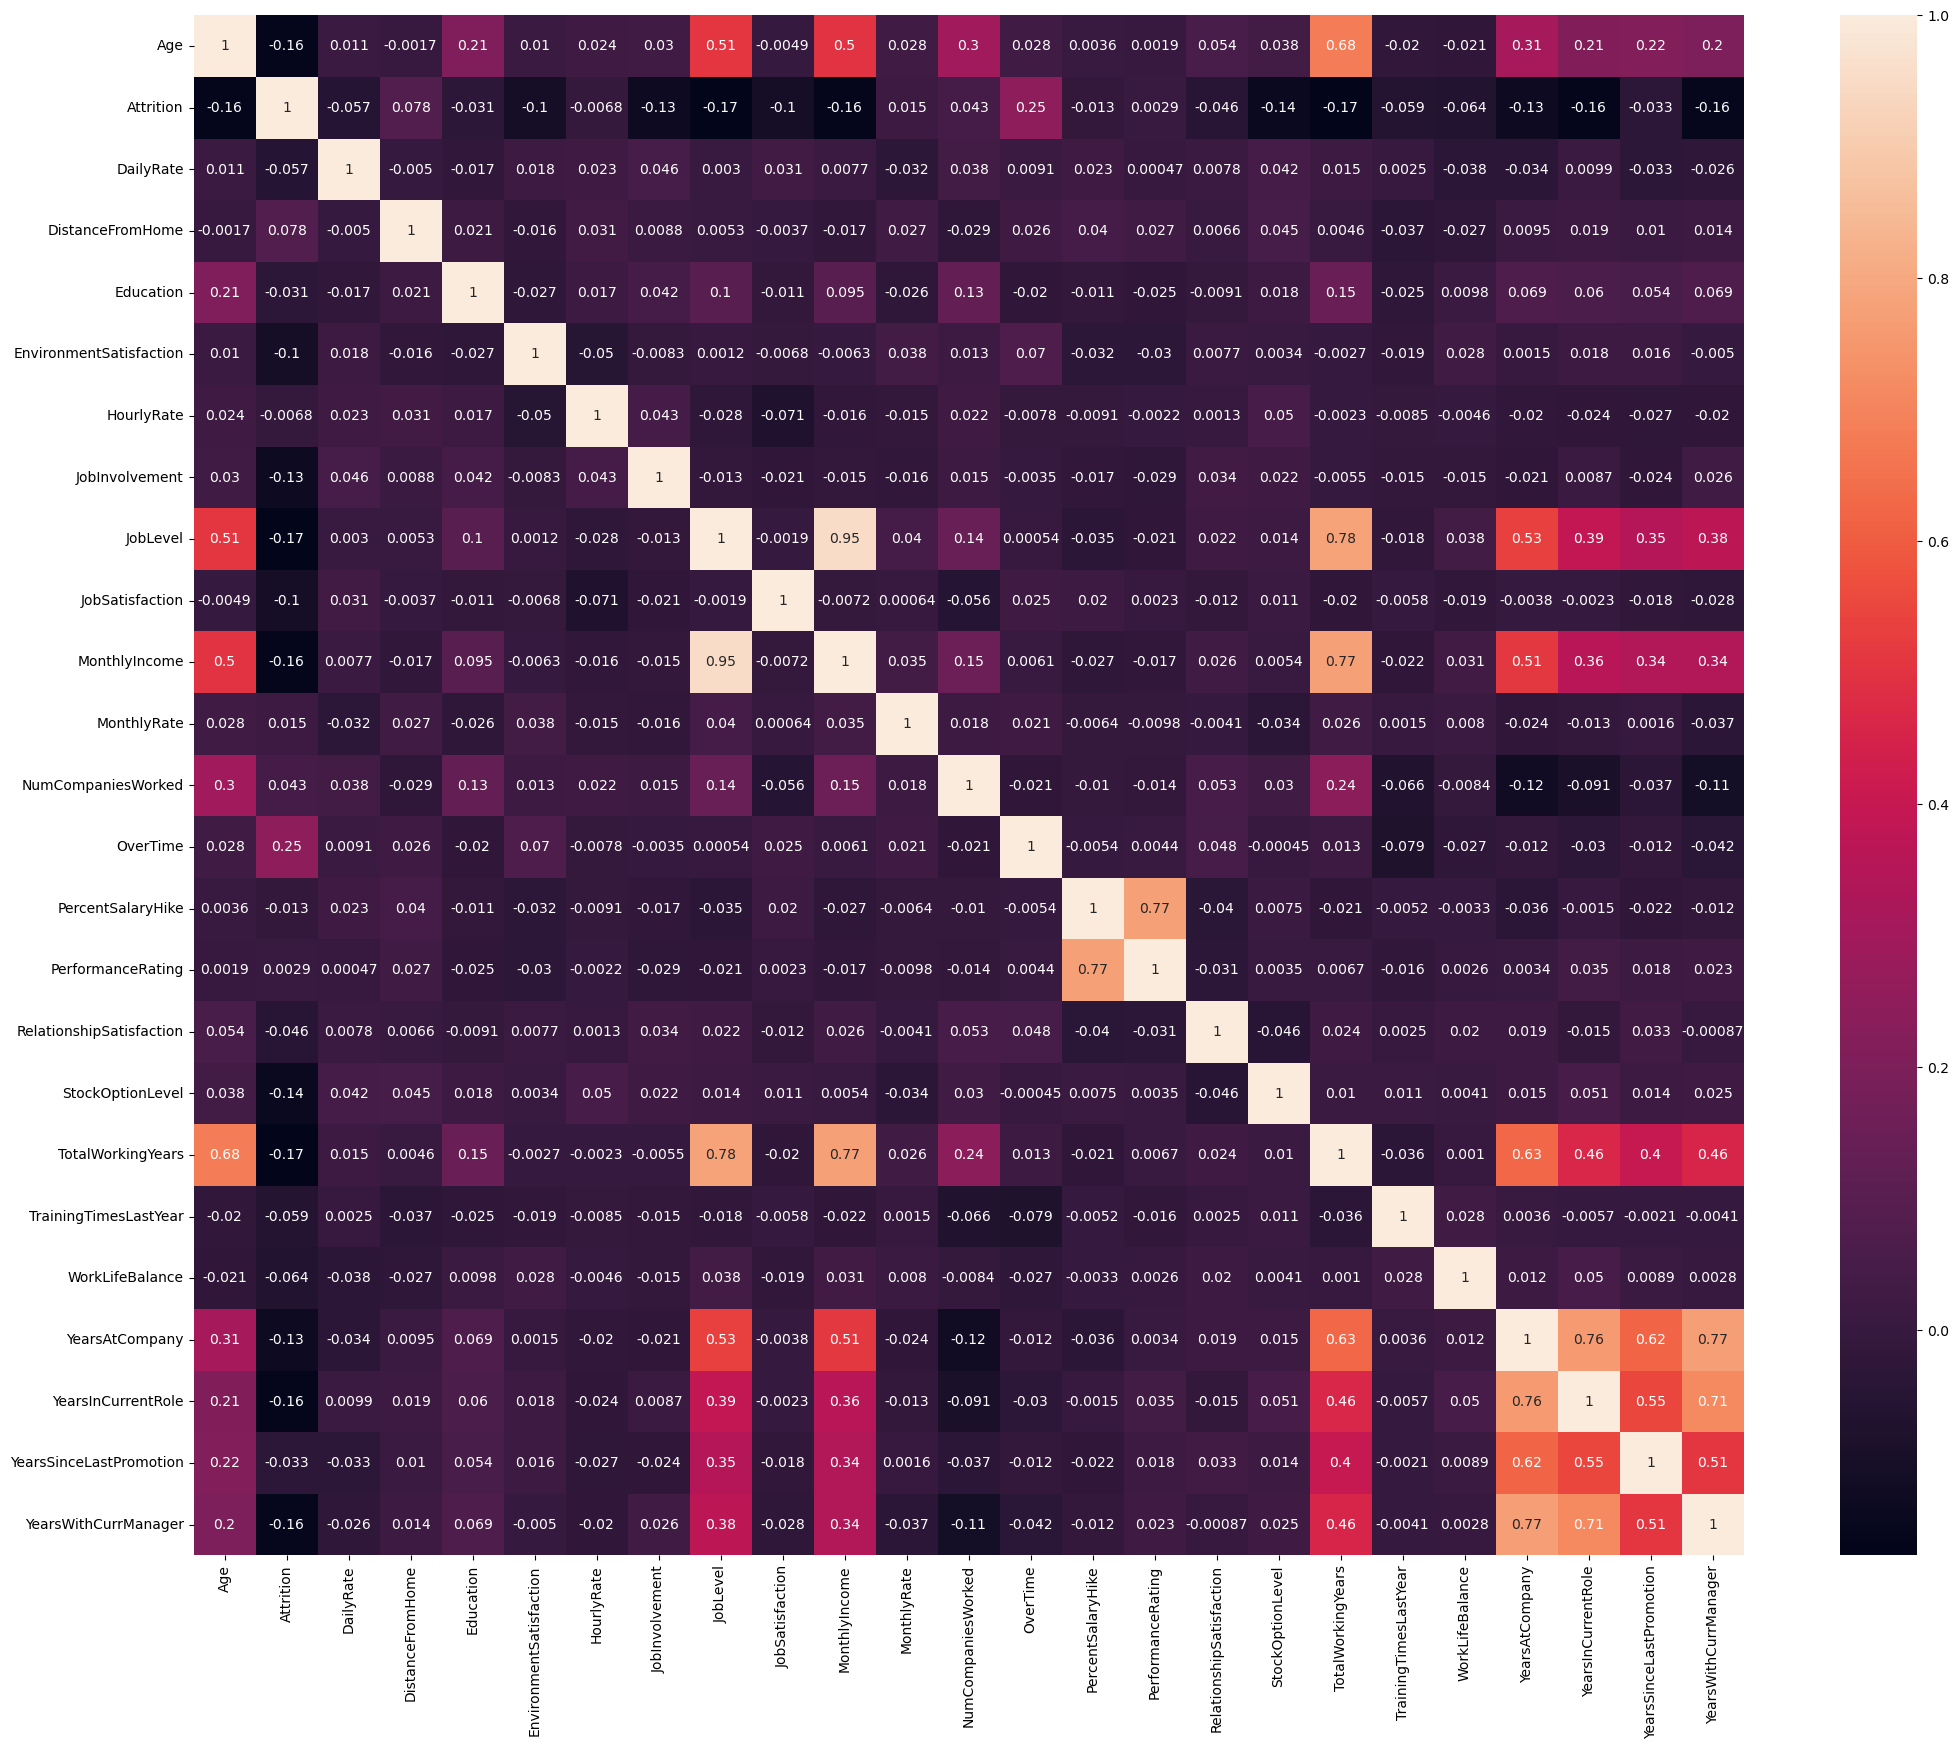

In [20]:
correlation = employee_df_corr.corr()
f, ax = plt.subplots(figsize=(25,20))
sns.heatmap(correlation, annot=True)

- Job level is strongly correlated with total working hours
- Monthly income is strongly correlated with Job level
- Monthly income is strongly correlated with total working hours
- Age is stongly correlated with monthly income


<Axes: xlabel='Age', ylabel='count'>

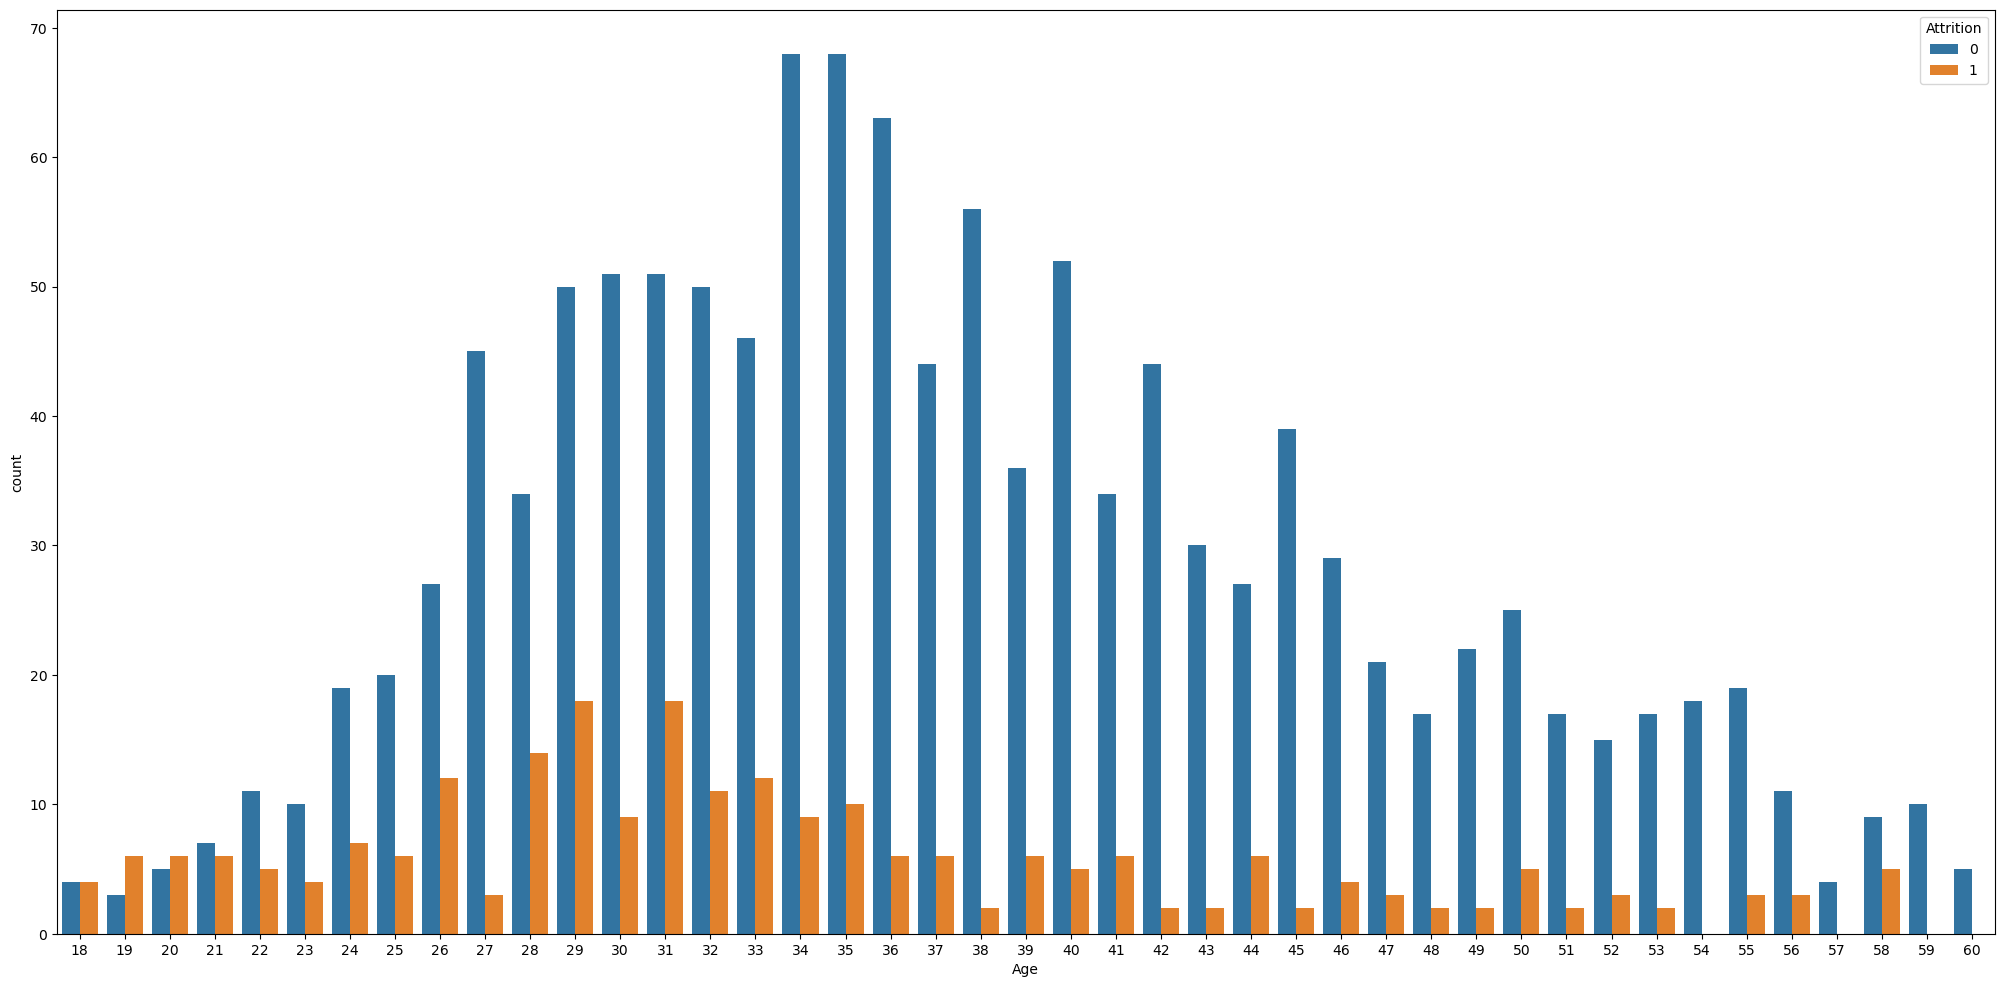

In [21]:
plt.figure(figsize=[25,12])
sns.countplot(x='Age', hue='Attrition', data=employee_df)

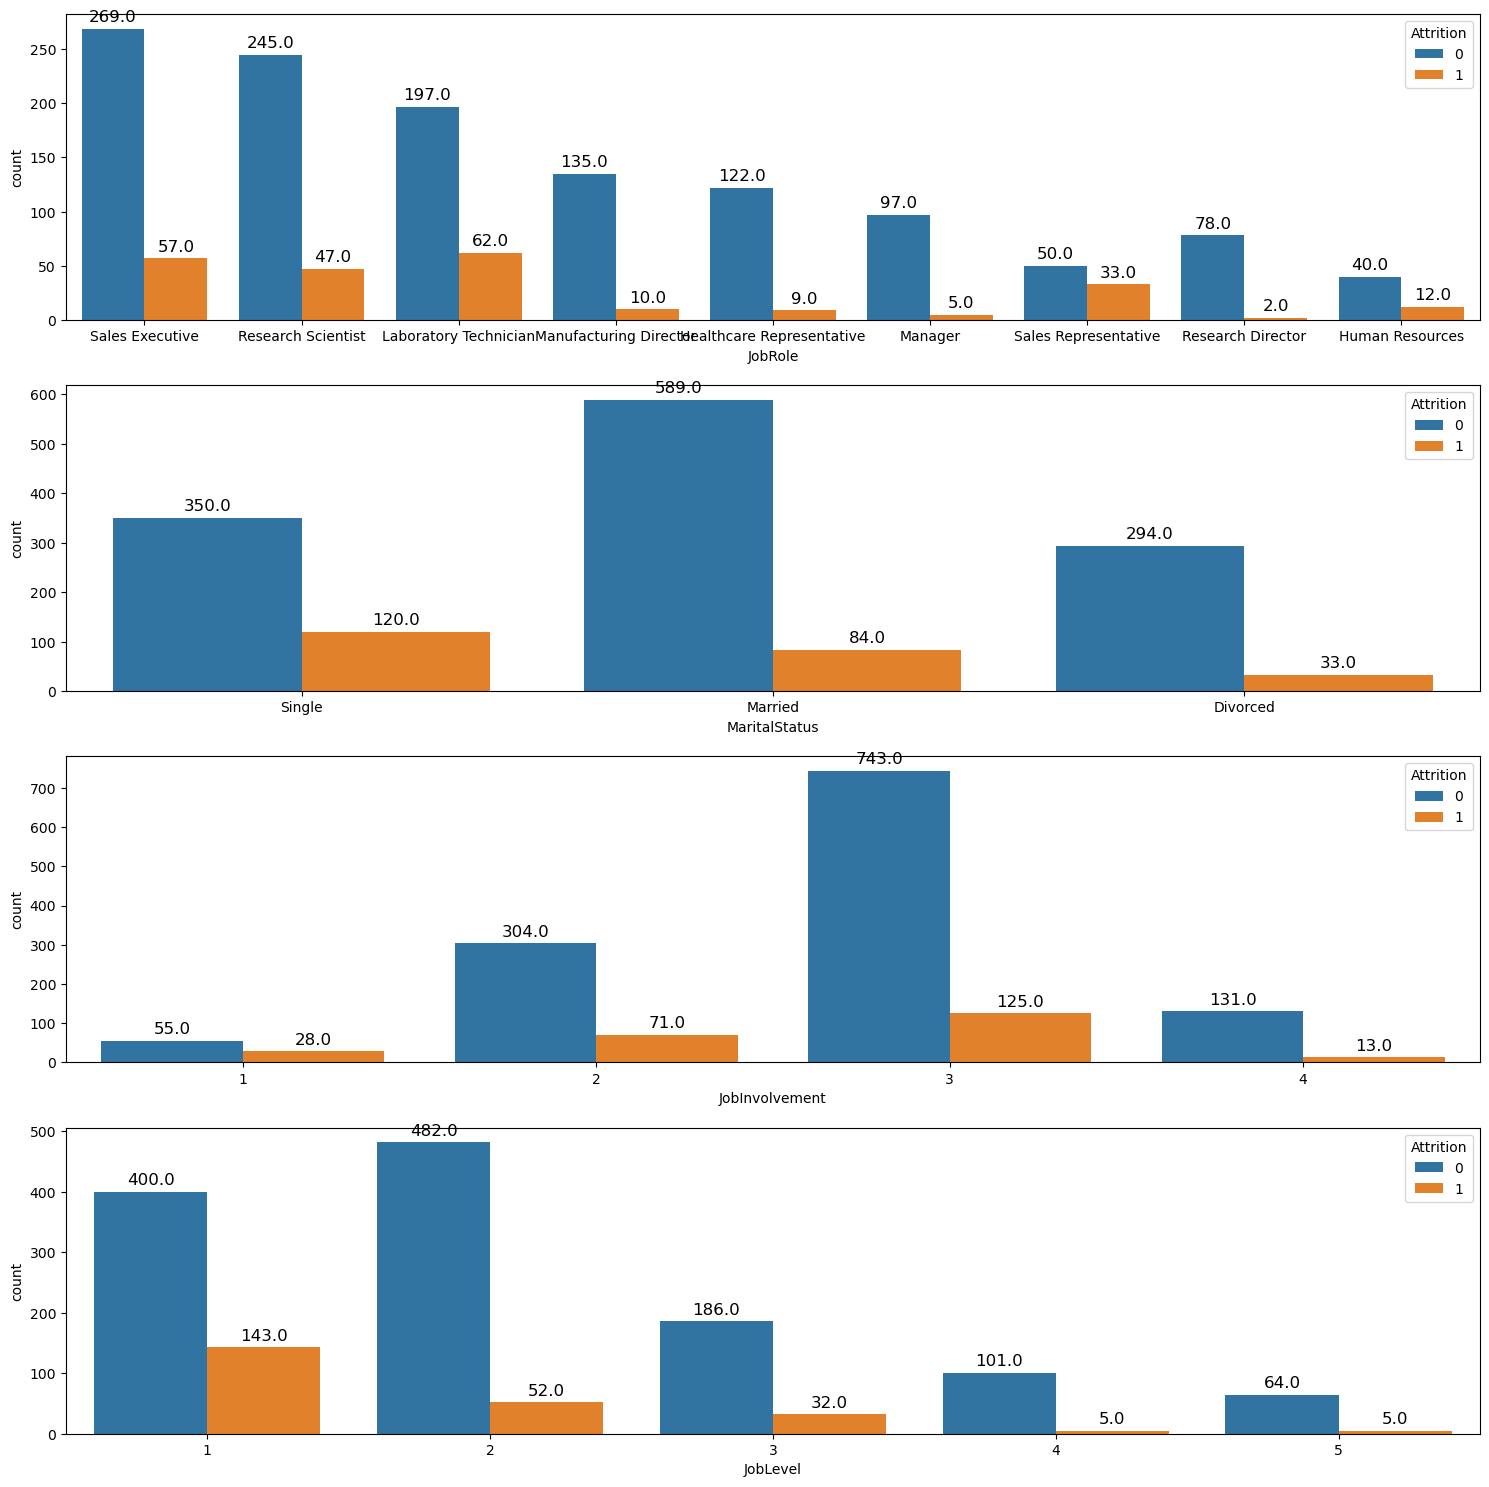

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to add value labels to each bar
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.figure(figsize=[15, 15])

# Plot 1: JobRole vs Attrition
plt.subplot(411)
ax1 = sns.countplot(x='JobRole', hue='Attrition', data=employee_df)
add_value_labels(ax1)

# Plot 2: MaritalStatus vs Attrition
plt.subplot(412)
ax2 = sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)
add_value_labels(ax2)

# Plot 3: JobInvolvement vs Attrition
plt.subplot(413)
ax3 = sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)
add_value_labels(ax3)

# Plot 4: JobLevel vs Attrition
plt.subplot(414)
ax4 = sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)
add_value_labels(ax4)

plt.tight_layout()
plt.show()



- Single employees tend to leave compared to married and divorced
- Sales Representitives tend to leave compared to any other job
- Less involved employees tend to leave the company
- Less experienced (low job level) tend to leave the company

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


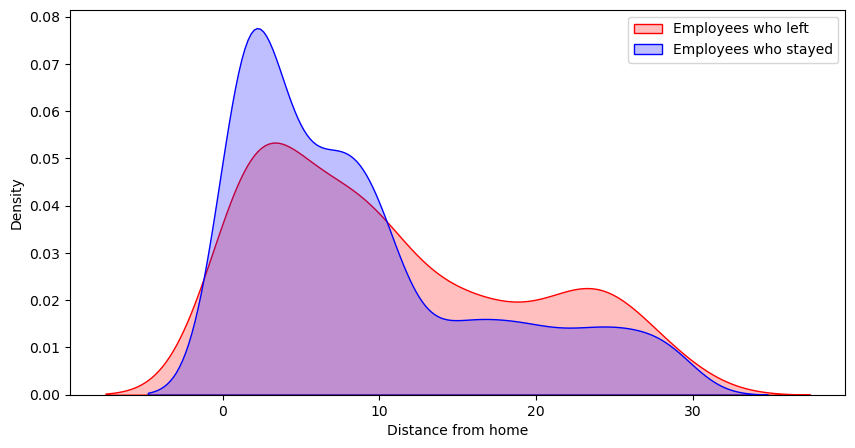

In [23]:
plt.figure(figsize=[10,5])
sns.kdeplot(left_company_df['DistanceFromHome'], label = 'Employees who left', fill = True, color = 'r')
sns.kdeplot(stayed_company_df['DistanceFromHome'], label = 'Employees who stayed', fill = True, color = 'b')
plt.xlabel('Distance from home')
plt.legend()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


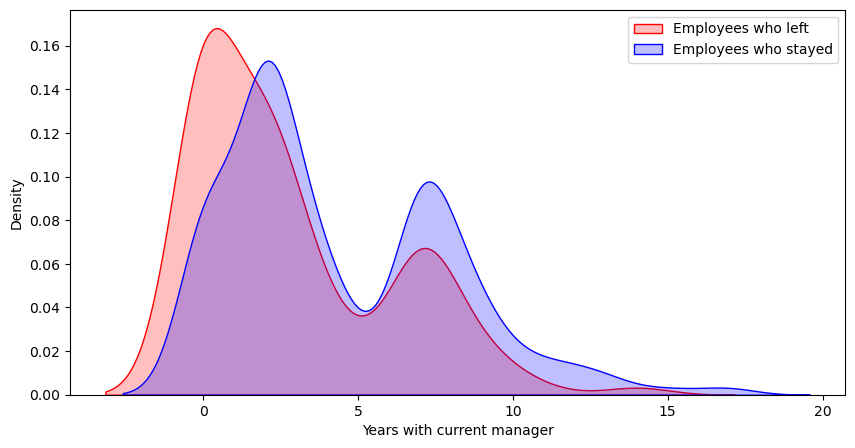

In [24]:
plt.figure(figsize=[10,5])
sns.kdeplot(left_company_df['YearsWithCurrManager'], label = 'Employees who left', fill = True, color = 'r')
sns.kdeplot(stayed_company_df['YearsWithCurrManager'], label = 'Employees who stayed', fill = True, color = 'b')
plt.xlabel('Years with current manager')
plt.legend()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


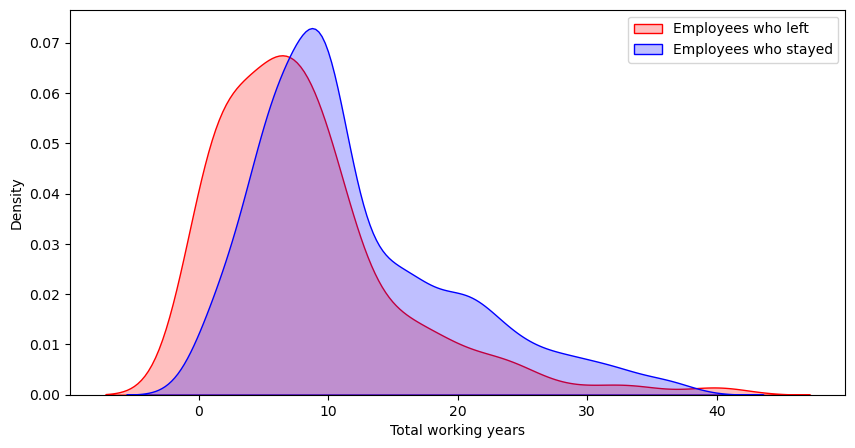

In [25]:
plt.figure(figsize=[10,5])
sns.kdeplot(left_company_df['TotalWorkingYears'], label = 'Employees who left', fill = True, color = 'r')
sns.kdeplot(stayed_company_df['TotalWorkingYears'], label = 'Employees who stayed', fill = True, color = 'b')
plt.xlabel('Total working years')
plt.legend()

#### Understanding other relationships

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

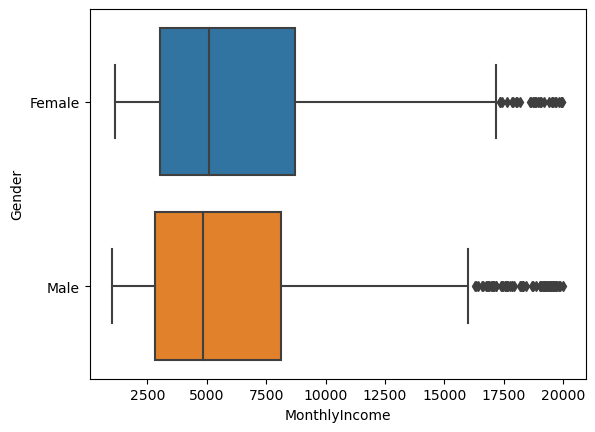

In [26]:
# Gender vs Monthly Income
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

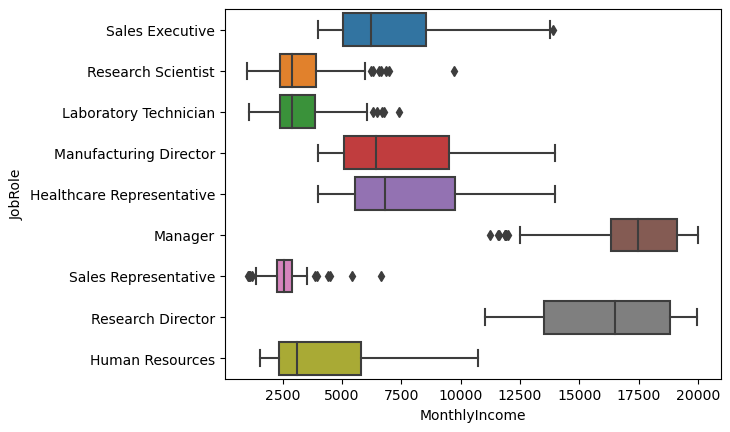

In [27]:
# Monthly Income vs Job Role
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)

### 3. Data preparation

In [28]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [29]:
X_cat = employee_df.select_dtypes(include=['object'])
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [30]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat.shape

(1470, 26)

In [31]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
X_numerical = employee_df.select_dtypes(include=['int']).drop(columns='Attrition')
X_numerical.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [33]:
X_all = pd.concat([X_cat, X_numerical], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


In [34]:
scaler = MinMaxScaler()
X_all.columns = X_all.columns.astype(str)
X = scaler.fit_transform(X_all)
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [35]:
y = employee_df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

### 4. Testing and training datasets

#### 4.1 Logistic Regression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [37]:
X_train.shape

(1102, 50)

In [38]:
X_test.shape

(368, 50)

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [41]:
def metrics(y_pred, y_test):
    print('Accuracy {} %'.format(100*accuracy_score(y_pred, y_test)))
    
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, annot = True)
    print(classification_report(y_test, y_pred))
    

Accuracy 89.40217391304348 %
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       310
           1       0.85      0.40      0.54        58

    accuracy                           0.89       368
   macro avg       0.87      0.69      0.74       368
weighted avg       0.89      0.89      0.88       368



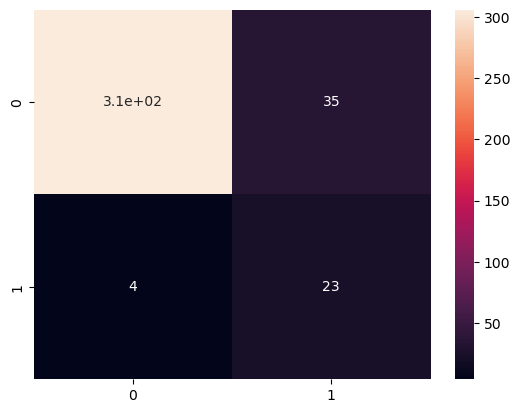

In [42]:
metrics(y_pred, y_test)

#### 4.2 Random Forest Classifier

In [43]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
y_pred = model.predict(X_test)

Accuracy 86.68478260869566 %
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       310
           1       0.91      0.17      0.29        58

    accuracy                           0.87       368
   macro avg       0.89      0.58      0.61       368
weighted avg       0.87      0.87      0.83       368



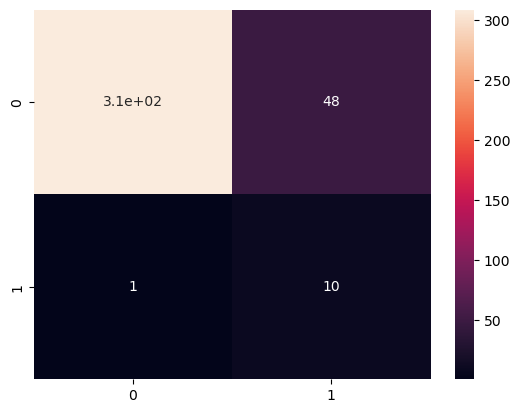

In [45]:
metrics(y_pred, y_test)

#### 4.3 Deep learning model

In [46]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape= (50,)))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 276501 (1.05 MB)
Trainable params: 276501 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split=0.2)

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4084 - accuracy: 0.8400 - val_loss: 0.4215 - val_accuracy: 0.8326
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8627 - val_loss: 0.4138 - val_accuracy: 0.8371
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8808 - val_loss: 0.4118 - val_accuracy: 0.7919
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2926 - accuracy: 0.8888 - val_loss: 0.4073 - val_accuracy: 0.8462
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.8967 - val_loss: 0.4037 - val_accuracy: 0.8462
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9126 - val_loss: 0.4073 - val_accuracy: 0.8507
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.9081 - val_loss: 0.4119 - val_accuracy: 0.8552
Epoch 8/100
1

In [50]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

12/12 [==============================] - 0s 601us/step


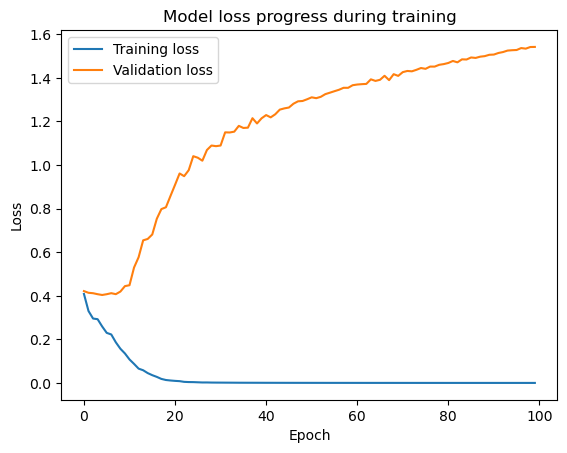

In [51]:
plt.plot(epochs_hist.history['loss'], label='Training loss')
plt.plot(epochs_hist.history['val_loss'], label='Validation loss')
plt.title("Model loss progress during training")
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

- Training Loss decreases and eventually reaches a very low value, almost zero. This could indicate that the model is learning and fitting the training data well.
- Validation Loss increases steadily after an initial rise, which means that the model's performance on unseen data is getting worse as training progresses. This could indicate that the model is memorizing the data

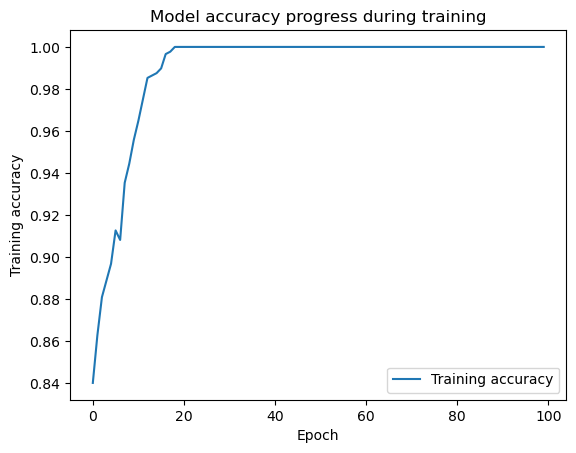

In [52]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Model accuracy progress during training")
plt.xlabel("Epoch")
plt.ylabel("Training accuracy")
plt.legend(['Training accuracy'])

Accuracy 86.95652173913044 %
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       310
           1       0.62      0.45      0.52        58

    accuracy                           0.87       368
   macro avg       0.76      0.70      0.72       368
weighted avg       0.86      0.87      0.86       368



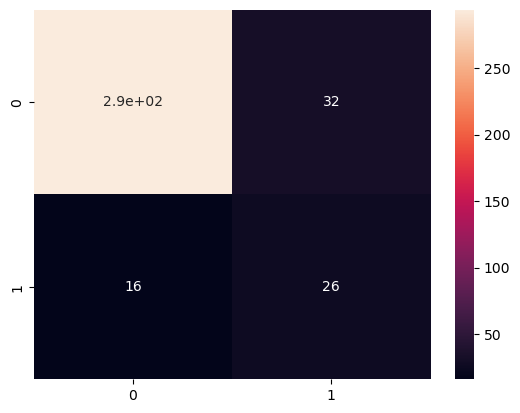

In [53]:
metrics(y_pred, y_test)

##### Oversampling minority class

In [54]:
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train, y_train)
epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50, validation_split=0.2)


Epoch 1/100
30/30 [==============================] - 0s 6ms/step - loss: 0.4971 - accuracy: 0.8841 - val_loss: 0.1623 - val_accuracy: 0.9676
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9654 - val_loss: 0.0950 - val_accuracy: 0.9730
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9817 - val_loss: 0.0976 - val_accuracy: 0.9730
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9925 - val_loss: 0.0445 - val_accuracy: 0.9946
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9973 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 0.9973
Epoch 8/100
3

In [55]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

12/12 [==============================] - 0s 735us/step


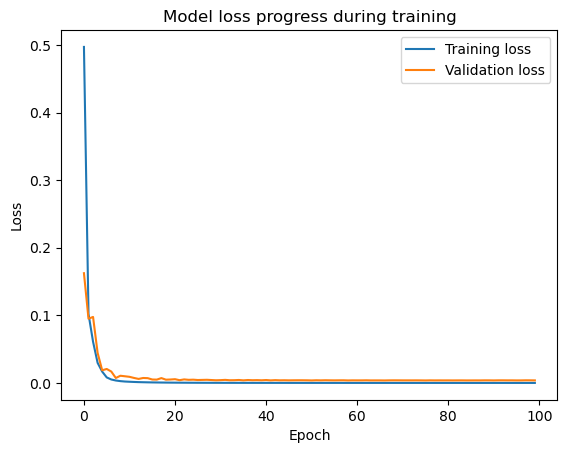

In [56]:
plt.plot(epochs_hist.history['loss'], label='Training loss')
plt.plot(epochs_hist.history['val_loss'], label='Validation loss')
plt.title("Model loss progress during training")
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

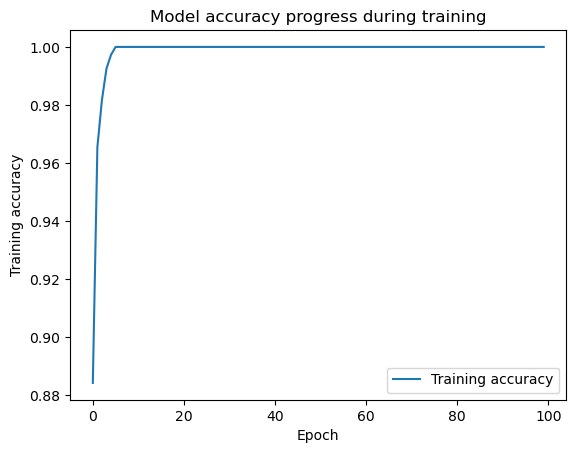

In [57]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Model accuracy progress during training")
plt.xlabel("Epoch")
plt.ylabel("Training accuracy")
plt.legend(['Training accuracy'])

Accuracy 84.78260869565217 %
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       310
           1       0.52      0.47      0.49        58

    accuracy                           0.85       368
   macro avg       0.71      0.69      0.70       368
weighted avg       0.84      0.85      0.84       368



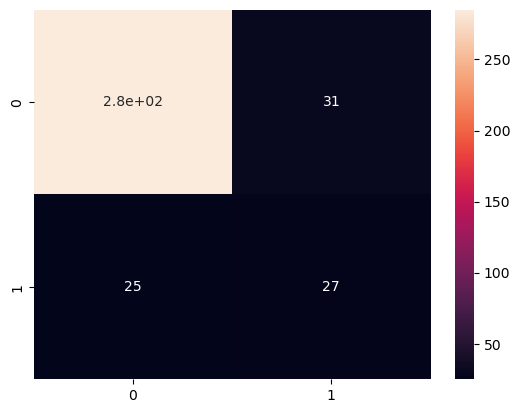

In [58]:
metrics(y_pred, y_test)

### 5. Remarks

- Oversampling did not improve the performance of the model, other techniques such as early stopping or regularization could help

- According to F1 Score, prediction for class 0 is strong, reflecting both high precision and recall, while the score for class 1 indicates a need for improvement in the model's performance for that class.

- The model that presented the best performance is Logistic Regression (when evaluating F1 Score and Accuracy)

- The significant difference in the number of observations can lead to a model that is biased toward predicting the majority class. This can result in high accuracy but poor performance on the minority class. The imbalance in the dataset represents a challenge for predicting employees who left.